# Práctica

## 1.- ANÁLISIS DESCRIPTIVO

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  

In [5]:
df = pd.read_csv("kc_house_data.csv")

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Eliminaremos la columna id, y la columna date, ya que no nos aportan nada.

In [7]:
df.drop(['id','date'],inplace=True,axis=1)

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.shape

(21613, 19)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("numero de duplicados: ", duplicate_rows_df.shape)

numero de duplicados:  (5, 19)


In [11]:
df.drop_duplicates(inplace=True)

## 2.- MISSINGS

In [12]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

No hay datos faltantes ni duplicados.

## GRÁFICOS DE INTERÉS


Veamos algunos gráficos de interés:

<Axes: xlabel='price', ylabel='Count'>

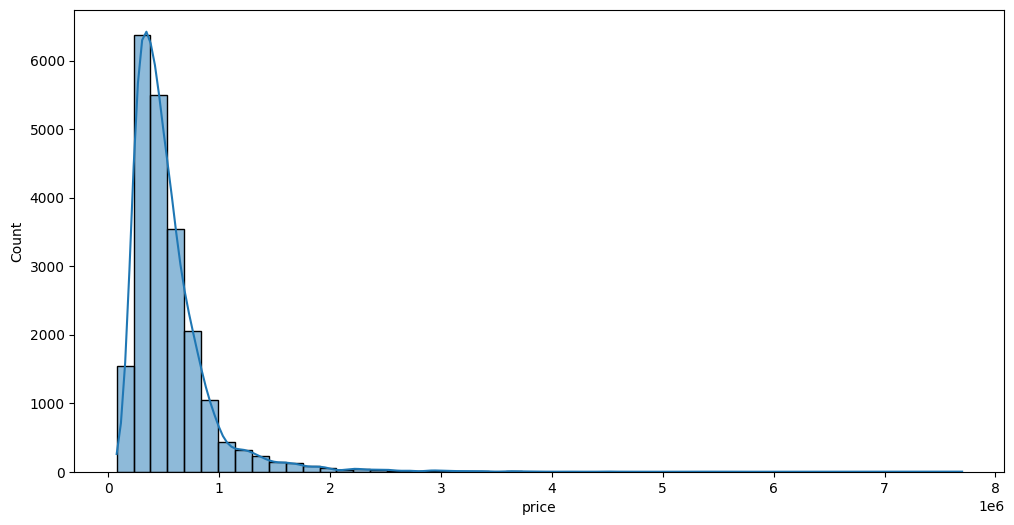

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['price'],kde=True,bins=50)

Observamos que, claramente, el precio no se distribuye de forma normal.

<Axes: xlabel='price'>

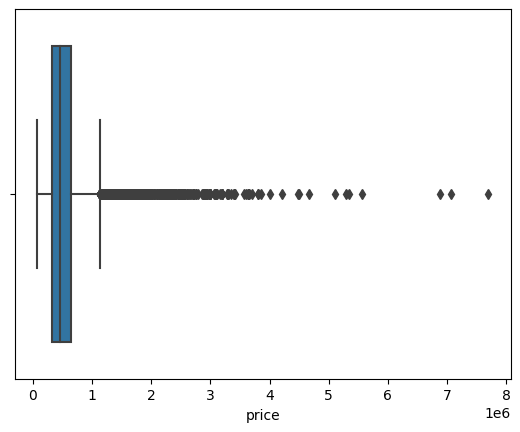

In [15]:
sns.boxplot(x=df['price'])

Tiene bastantes outliers por encima, seguramente de viviendas muy grandes y caras. La mayoría de las viviendas son de precios por debajo del millón.

Veamos si existen algunas relaciones con la variable precio:

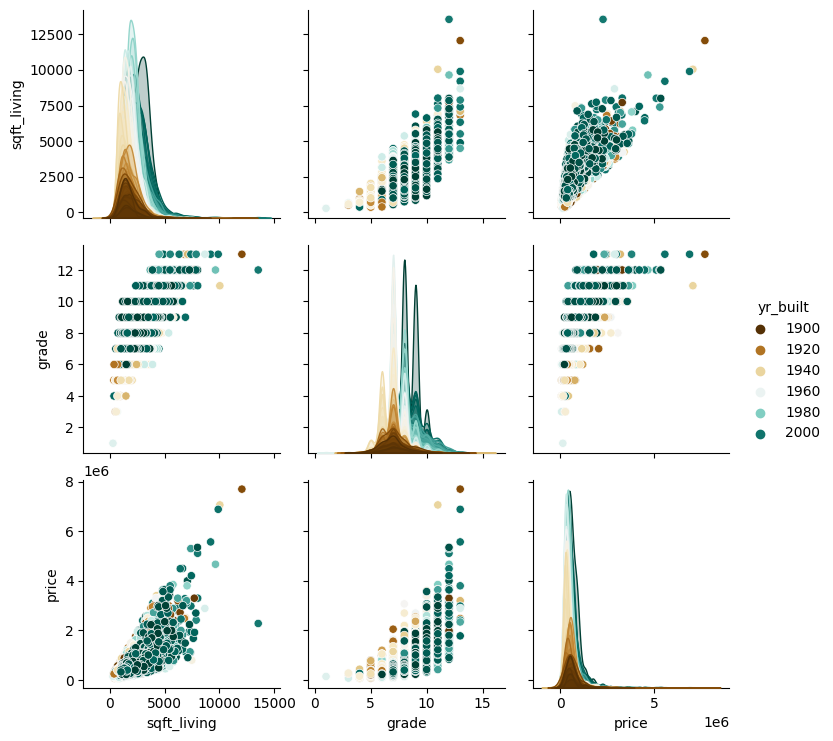

In [16]:
sns.pairplot(df,vars=["sqft_living","grade","price"],hue="yr_built",palette="BrBG")

<Axes: xlabel='yr_built', ylabel='price'>

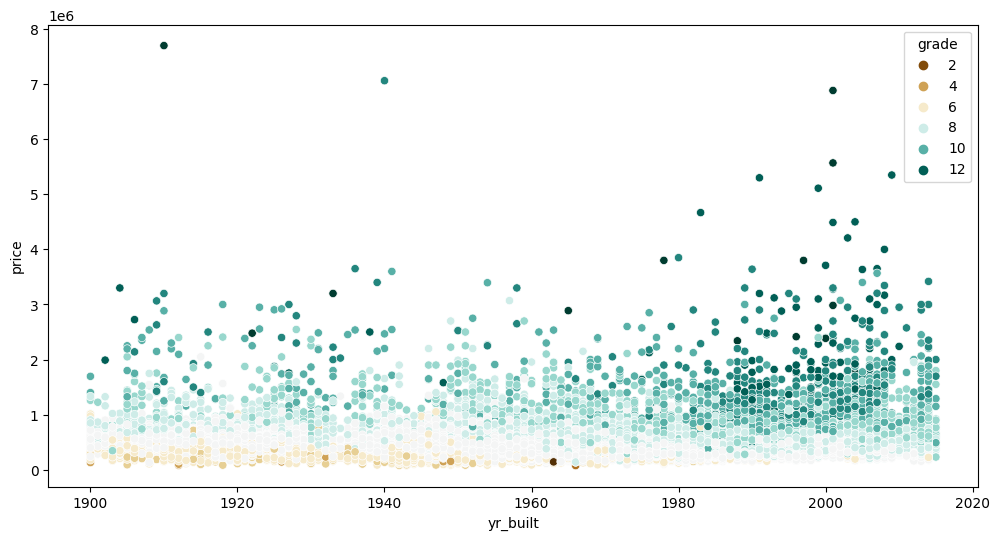

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='yr_built',y='price',data=df,hue='grade',palette="BrBG")

Vemos, que según las viviendas van siendo más modernas tienen un grado mayor. También aparecen viviendas de precios más altos en la actualidad.

Analizaremos a continuación las distintas correlaciones entre variables.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


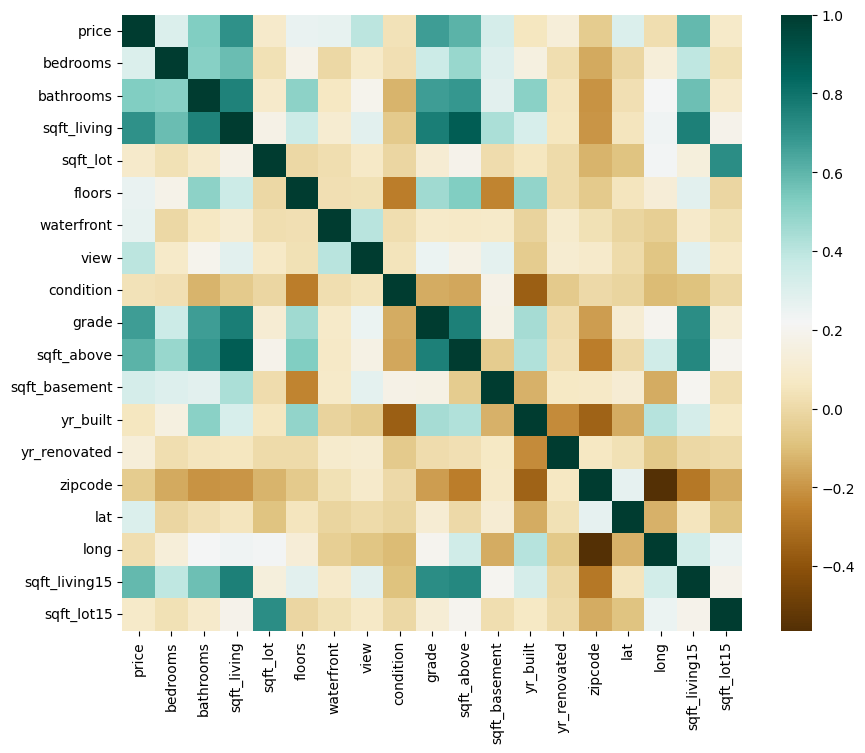

In [18]:
plt.figure(figsize=(10,8))
correlaciones = df.corr()
sns.heatmap(correlaciones,cmap="BrBG")
correlaciones

En general, la variable precio no tiene una correlación demasiado alta con ninguna otra variable. Las que mayor correlación tienen con precio serían las que hablan de superficie, y el grado.

Nos podríamos plantear eliminar sqft_living o sqft_above, ya que tienen correlación muy alta.

## 3.- FEATURE ENGINEERING

Vamos a relacionar algunas variables.

In [19]:
df['bedrooms_bathrooms']   = df['bedrooms']*df['bathrooms']

In [21]:
df['lat_long']    = df['lat']*df['long']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_bathrooms,lat_long
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,...,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435,0.516627,-0.265517
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,...,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197,0.802541,0.053537
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,...,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192,0.890182,0.056643
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,...,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258,0.777447,0.037843
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,...,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552,0.075086,0.156968
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,...,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180,0.384330,0.000027
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,...,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698,0.042194,-0.001995
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,...,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566,0.172059,-0.033045
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,...,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449,-0.070029,-0.024238
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,...,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319,0.588113,-0.031603


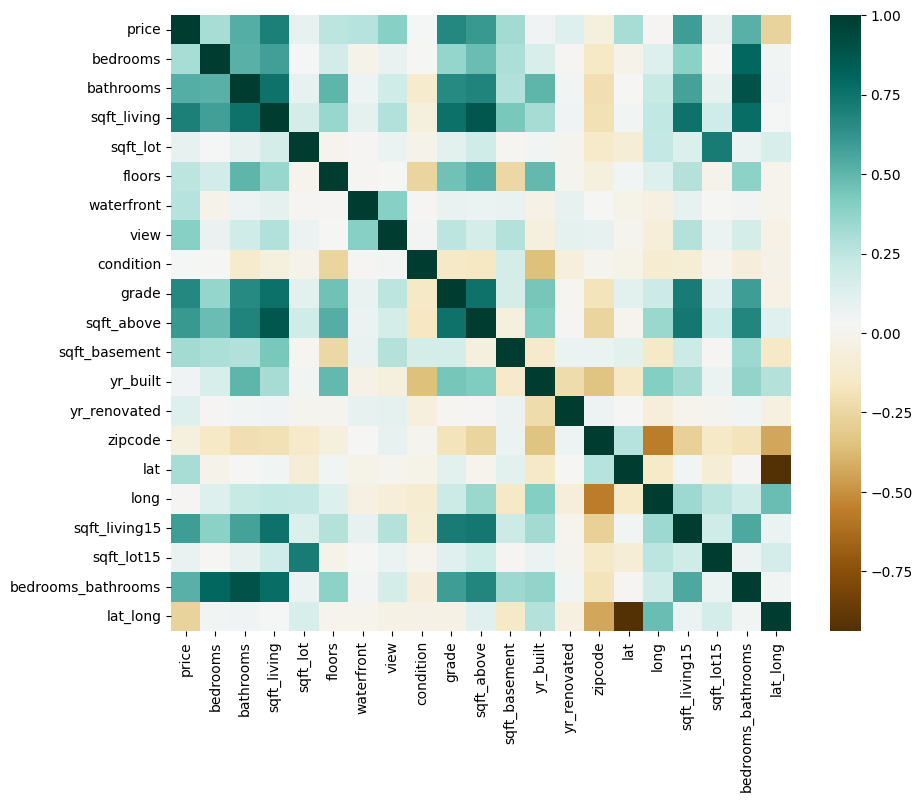

In [22]:
plt.figure(figsize=(10,8))
correlaciones = df.corr()
sns.heatmap(correlaciones,cmap="BrBG")
correlaciones

Vamos a eliminar las columnas lat, long, y zipcode, y nos quedaremos con lat_long. Esta última recoge información de las otras 3 variables.

In [23]:
df.drop(['lat','long','zipcode'],inplace=True,axis=1)

También nos quedamos solo con sqft_living, y eliminaremos sqft_above.

In [24]:
df.drop('sqft_above',inplace=True,axis=1)

Por último eliminamos bedrroms, y bathrooms, ya que nos hemos creado la variable bedrooms_bathrooms.

In [25]:
df.drop(['bedrooms','bathrooms'],inplace=True,axis=1)

In [26]:
df.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,lat_long
0,221900.0,1180,5650,1.0,0,0,3,7,0,1955,0,1340,5650,3.00,-5808.576778
1,538000.0,2570,7242,2.0,0,0,3,7,400,1951,1991,1690,7639,6.75,-5837.184999
2,180000.0,770,10000,1.0,0,0,3,6,0,1933,0,2720,8062,2.00,-5835.146731
3,604000.0,1960,5000,1.0,0,0,5,7,910,1965,0,1360,5000,12.00,-5816.213274
4,510000.0,1680,8080,1.0,0,0,3,8,0,1987,0,1800,7503,6.00,-5811.392356


Vamos a particionar la variable objetivo en 5 clases, que serán las que predeciremos.

In [27]:
q2 = np.quantile(df['price'], 0.2)
q4 = np.quantile(df['price'], 0.4)
q6 = np.quantile(df['price'], 0.6)
q8 = np.quantile(df['price'], 0.8)

In [28]:
categories = [0, q2, q4, q6, q8, max(df['price'])+1]
values = df['price']
# Categorizar los valores
categories_values = []
for value in values:
    for i in range(len(categories)-1):
        if value >= categories[i] and value < categories[i+1]:
            categories_values.append(i)
            break

# Asignar etiquetas a las categorías
labels = ['Muy Barata', 'Barata', 'Normal', 'Cara', 'Muy Cara']


In [29]:
df['price_cat']=categories_values

In [30]:
df.head()

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,lat_long,price_cat
0,221900.0,1180,5650,1.0,0,0,3,7,0,1955,0,1340,5650,3.00,-5808.576778,0
1,538000.0,2570,7242,2.0,0,0,3,7,400,1951,1991,1690,7639,6.75,-5837.184999,3
2,180000.0,770,10000,1.0,0,0,3,6,0,1933,0,2720,8062,2.00,-5835.146731,0
3,604000.0,1960,5000,1.0,0,0,5,7,910,1965,0,1360,5000,12.00,-5816.213274,3
4,510000.0,1680,8080,1.0,0,0,3,8,0,1987,0,1800,7503,6.00,-5811.392356,2


## 4.- PARTICIONAMIENTO Y ESCALADO

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [32]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = df.values

y = (data[:,15:16])     # nos quedamos con la 1ª columna, price (con logaritmo)
X = data[:,1:15]      # nos quedamos con el resto

feature_names = df.columns[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (16206, 14)
Datos test:  (5402, 14)


## 5.- ALGORITMOS DE CLASIFICACIÓN

### Regresión Lineal

In [33]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('El error cuadrático medio MSE es {}'.format(mse))
print('El RMSE es {}'.format(rmse))
print('El R cuadrado es {}'.format(r2))

El error cuadrático medio MSE es 0.6805426251954051
El RMSE es 0.8249500743653552
El R cuadrado es 0.6563605999308038


Observamos que el RMSE no es demasiado bajo, las predicciones se desvían 185793 dólares de sus valores reales. 

### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.41336542021473527
Precisión de 0.41336542021473527
La sensibilidad, o recall es 0.41336542021473527
El f1 score es 0.41336542021473527


In [47]:
algoritmos= pd.DataFrame({'Accuracy':[],'Precision':[],'Recall':[],'F1Score':[]})
algoritmos.loc['KNN']=[accuracy,precision,recall,f1score]

     Accuracy  Precision    Recall   F1Score
KNN  0.413365   0.413365  0.413365  0.413365


[[649 256 129  54   9]
 [345 346 216 119  48]
 [260 275 303 199  99]
 [121 191 244 331 160]
 [ 37  87 122 198 604]]


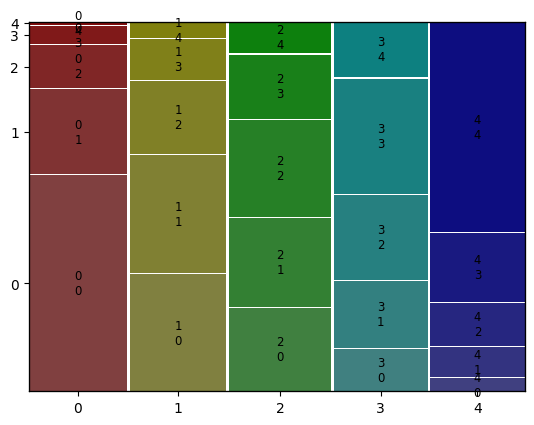

In [48]:
from statsmodels.graphics.mosaicplot import mosaic
print(cm)
mosaic(cm)
plt.show()

### ÁRBOL DE DECISIÓN SIMPLE

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = clf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.5883006293965198
Precisión de 0.5883006293965198
La sensibilidad, o recall es 0.5883006293965198
El f1 score es 0.5883006293965198


In [52]:
algoritmos.loc['ÁRBOL']=[accuracy,precision,recall,f1score]

[[792 230  57  16   2]
 [218 548 221  78   9]
 [ 54 256 526 245  55]
 [ 19  65 248 525 190]
 [  2   8  46 205 787]]


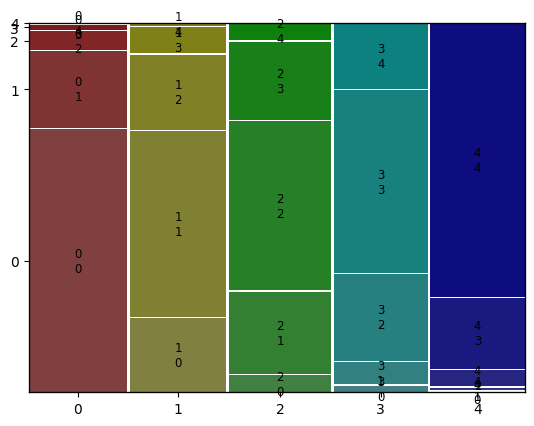

In [53]:
print(cm)
mosaic(cm)
plt.show()

### BAGGING

In [54]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=1)

bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [55]:
y_pred = bagging_clf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.6512402813772676
Precisión de 0.6512402813772676
La sensibilidad, o recall es 0.6512402813772676
El f1 score es 0.6512402813772676


In [57]:
algoritmos.loc['BAGGING']=[accuracy,precision,recall,f1score]

[[876 177  34   7   3]
 [197 630 209  33   5]
 [ 47 266 578 224  21]
 [ 18  53 235 603 138]
 [  1   5  34 177 831]]


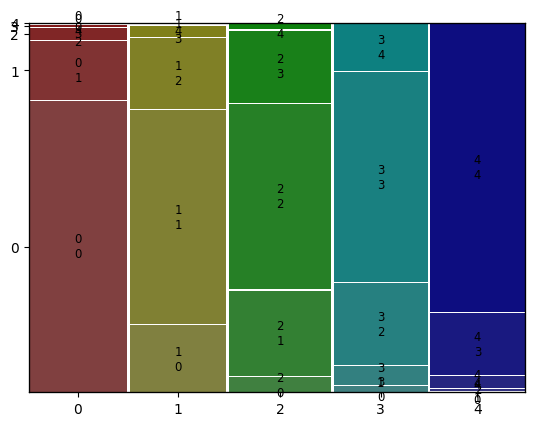

In [58]:
print(cm)
mosaic(cm)
plt.show()

### RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)

rf_clf.fit(X_train, y_train)

<ipython-input-59-b82d20419768>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [60]:
y_pred = rf_clf.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.6717882265827472
Precisión de 0.6717882265827472
La sensibilidad, o recall es 0.6717882265827472
El f1 score es 0.6717882265827472


In [62]:
algoritmos.loc['RANDOM FOREST']=[accuracy,precision,recall,f1score]

[[883 183  26   5   0]
 [169 662 204  37   2]
 [ 40 233 607 239  17]
 [  7  27 235 622 156]
 [  1   2  18 172 855]]


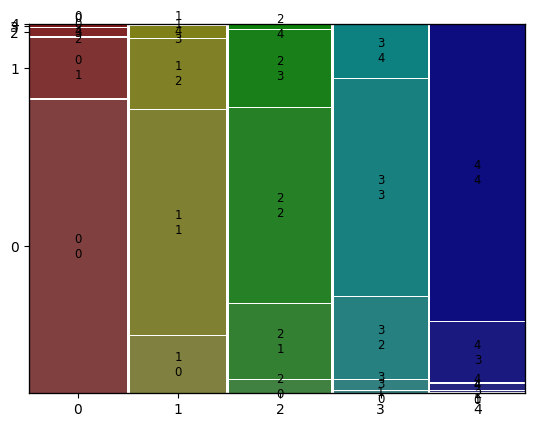

In [63]:
print(cm)
mosaic(cm)
plt.show()

### GRADIENT BOOST

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=1)

gb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=1)

In [71]:
y_pred = gb_clf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.6447611995557201
Precisión de 0.6447611995557201
La sensibilidad, o recall es 0.6447611995557201
El f1 score es 0.6447611995557201


In [73]:
algoritmos.loc['GRADIENT BOOST']=[accuracy,precision,recall,f1score]

[[870 198  23   5   1]
 [188 623 206  54   3]
 [ 40 285 502 293  16]
 [  5  43 189 648 162]
 [  0   5  17 186 840]]


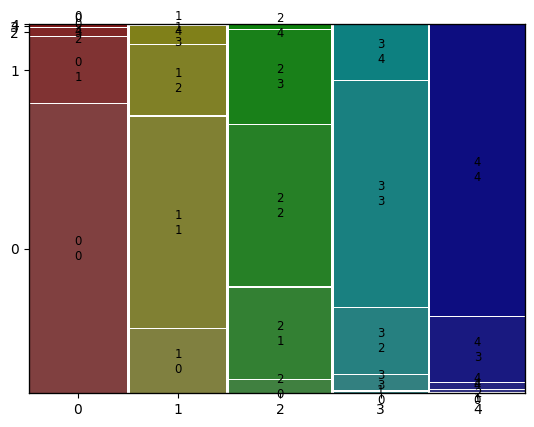

In [74]:
print(cm)
mosaic(cm)
plt.show()

### XGBOOST

In [75]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=1)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [76]:
y_pred = xgb_clf.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1score = f1_score(y_test, y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy de {}'.format(accuracy))
print('Precisión de {}'.format(precision))
print('La sensibilidad, o recall es {}'.format(recall))
print('El f1 score es {}'.format(f1score))

Accuracy de 0.6766012587930396
Precisión de 0.6766012587930396
La sensibilidad, o recall es 0.6766012587930396
El f1 score es 0.6766012587930396


In [78]:
algoritmos.loc['XGBOOST']=[accuracy,precision,recall,f1score]

[[876 183  31   5   2]
 [162 660 210  34   8]
 [ 23 246 591 261  15]
 [  6  26 195 666 154]
 [  0   2  20 164 862]]


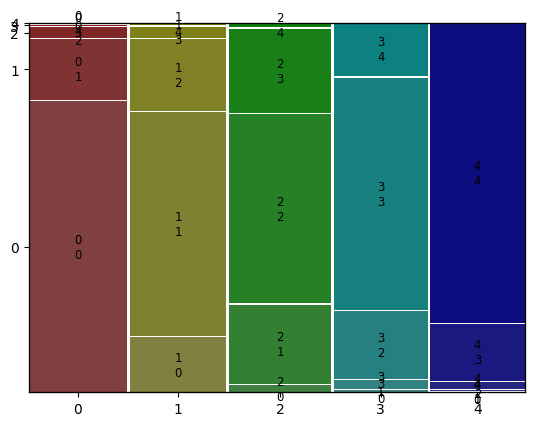

In [79]:
print(cm)
mosaic(cm)
plt.show()

## 6.- EVALUACIÓN DE MÉTRICAS Y MODELOS

Las métricas de la curva ROC y el área bajo la curva no las hemos implementado, ya que serían para una clasificación en 2 grupos, como eran precios, y hemos dividido en 5 clases, estas métricas no tenían sentido.

Al obtener resultados muy parecidos para el resto de métricas, daría un poco igual cual elegir. Nos quedaremos con accuracy, para comparar entre modelos.

### MODELOS 

In [80]:
print(algoritmos)

                Accuracy  Precision    Recall   F1Score
KNN             0.413365   0.413365  0.413365  0.413365
ÁRBOL           0.588301   0.588301  0.588301  0.588301
BAGGING         0.651240   0.651240  0.651240  0.651240
RANDOM FOREST   0.671788   0.671788  0.671788  0.671788
GRADIENT BOOST  0.644761   0.644761  0.644761  0.644761
XGBOOST         0.676601   0.676601  0.676601  0.676601


In [82]:
print(algoritmos.sort_values(by='Accuracy',ascending=False))

                Accuracy  Precision    Recall   F1Score
XGBOOST         0.676601   0.676601  0.676601  0.676601
RANDOM FOREST   0.671788   0.671788  0.671788  0.671788
BAGGING         0.651240   0.651240  0.651240  0.651240
GRADIENT BOOST  0.644761   0.644761  0.644761  0.644761
ÁRBOL           0.588301   0.588301  0.588301  0.588301
KNN             0.413365   0.413365  0.413365  0.413365


Por orden del accuracy, los modelos, de mejor a peor serían:



1.   XGBoost
2.   Random Forest
3.   Bagging
4.   Gradient Boost
5.   Árbol de Decisión Simple
6.   KNN

## 7.- Importancia de Variables

Vamos a medir la importancia de las diferentes variables usando el F-Test Score, y la Mutual Information Score:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


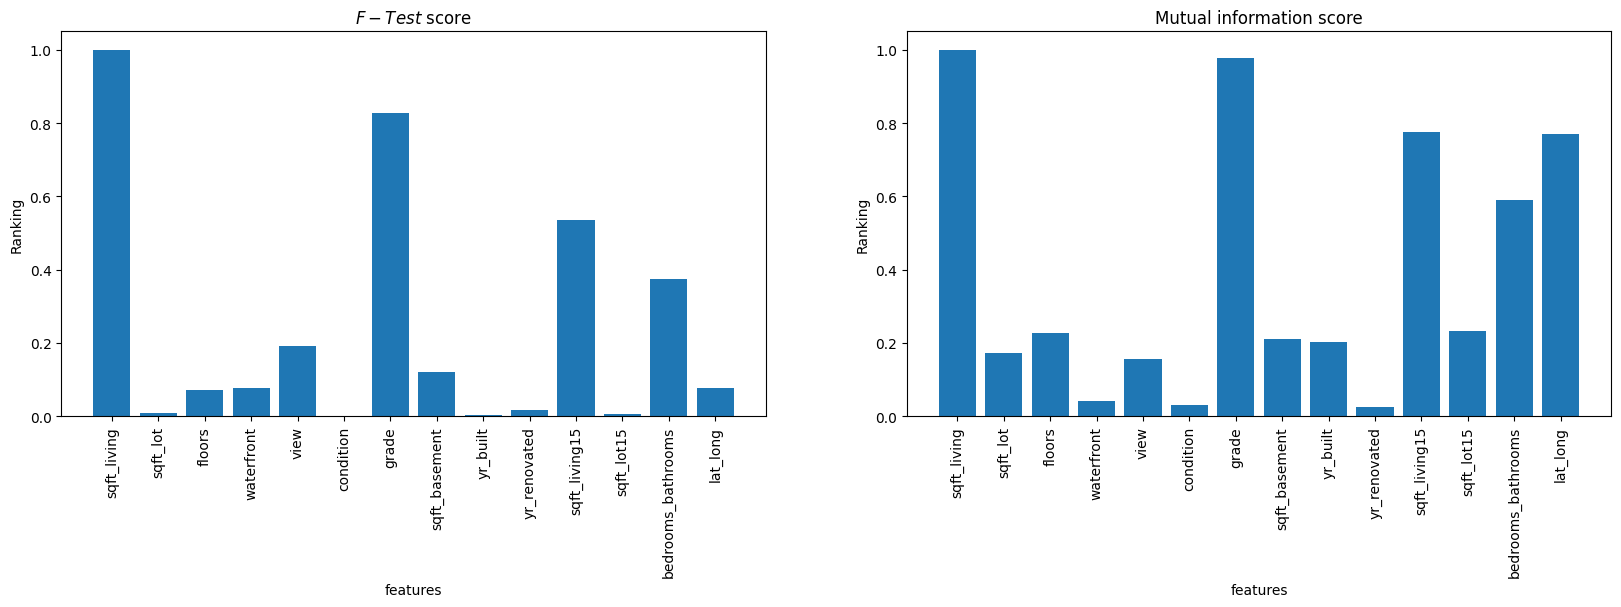

In [83]:
from sklearn.feature_selection import f_regression, mutual_info_regression

df.drop('price_cat',inplace=True,axis=1)
data = df.values 

y = data[:,0:1]     
X = data[:,1:]      

feature_names = df.columns[1:]

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Observando ambas gráficas, que coinciden bastante, podemos decir que las dos variables más influyentes serían sqft_living y grade.